In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('InflationRates.csv', delimiter=';')

# string to float (1997)
df['Bulgaria'] = df['Bulgaria'].str.replace(',', '').astype(float)

In [12]:
df.head()

,Year,Bulgaria,EU,USA,World
0,2022,15.33,8.83,8.00,8.27
1,2021,3.30,2.55,4.70,3.48
2,2020,1.67,0.48,1.23,1.93
3,2019,3.10,1.63,1.81,2.21
4,2018,2.81,1.74,2.44,2.44


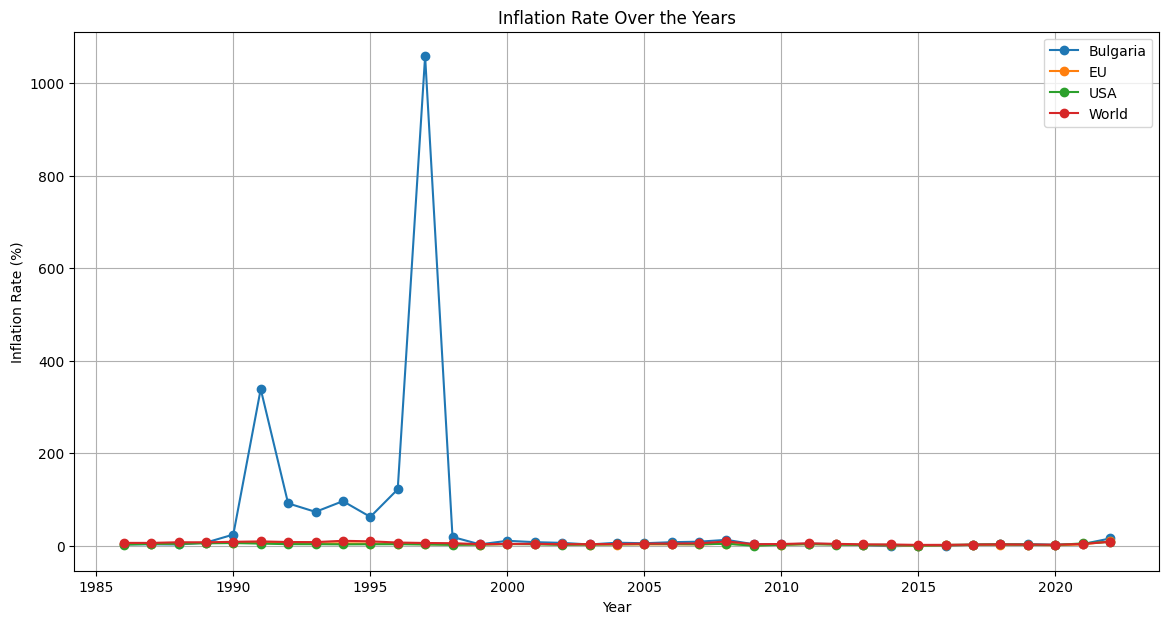

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Year'], df['Bulgaria'], label='Bulgaria', marker='o')
plt.plot(df['Year'], df['EU'], label='EU', marker='o')
plt.plot(df['Year'], df['USA'], label='USA', marker='o')
plt.plot(df['Year'], df['World'], label='World', marker='o')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.title('Inflation Rate Over the Years')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df.describe()


,Year,Bulgaria,EU,USA,World
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,2004.000000,54.167297,3.061351,2.752703,4.862162
std,10.824355,180.237767,1.945094,1.503964,2.488610
min,1986.000000,-1.420000,-0.060000,-0.360000,1.430000
25%,1995.000000,2.570000,1.740000,1.810000,2.940000
50%,2004.000000,5.040000,2.660000,2.680000,4.110000
75%,2013.000000,15.330000,4.160000,3.380000,7.000000
max,2022.000000,1058.370000,8.830000,8.000000,10.320000


> СТАТИСТИЧЕСКО ОБОБЩЕНИЕ НА ДАННИТЕ
***
Наборът от данни обхваща периода от 1986 г. до 2022 г. 

- България
    - Средният темп на инфлация за България е приблизително 54,17%
    - Стандартното отклонение е приблизително 180,24%
    - Минималният темп на инфлация е -1,42%
    - Максималният темп на инфлация 1058,37%
     
- ЕС
    - Средният темп на инфлация за ЕС е приблизително 3,06%
    - Минималният темп на инфлация -0,06%
    - Максималният темп на инфлация 8,83%

- САЩ
    - Средният темп на инфлация за ЕС е приблизително 2,75%
    - Минималният темп на инфлация -0.36%
    - Максималният темп на инфлация 8%
    

`Високата нестабилност може да означава икономическа нестабилност или промяна на икономическата политика`

In [5]:
correlation_matrix = df[['Bulgaria', 'EU', 'USA', 'World']].corr()
print(correlation_matrix)

          Bulgaria        EU       USA     World
Bulgaria  1.000000  0.138082  0.026563  0.229735
EU        0.138082  1.000000  0.837174  0.858520
USA       0.026563  0.837174  1.000000  0.612667
World     0.229735  0.858520  0.612667  1.000000


Коефициентът на корелация е 0.138082


 Това е положителна, но слаба корелация. Това означава, че има слаба положителна линейна зависимост между нивата на инфлация в България и ЕС, но тя не е силна. Когато темповете на инфлация в ЕС са склонни да се повишават, темповете на инфлация в България също са склонни да се повишават, но само в малка степен.

България спрямо САЩ: Коефициентът е 0.026563


 Това е много слаба положителна корелация, почти незначителна. Тя показва, че почти няма линейна зависимост между темповете на инфлация в България и САЩ.

#EU

In [17]:
# data prep

# Using the dataframe 'df'
X_eu = df[['EU']]  # Predictor variable
y_eu = df['Bulgaria']  # Target variable

# Splitting data
X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_eu, y_eu, test_size=0.2, random_state=42)

In [18]:
# 1.2. Model Training and Prediction

# Create a Linear Regression model
model_eu = LinearRegression()

# Fit the model with the training data
model_eu.fit(X_train_eu, y_train_eu)

# Make predictions using the test data
y_pred_eu = model_eu.predict(X_test_eu)

In [19]:
# Evaluation

print("Bulgaria vs EU - R^2:", r2_score(y_test_eu, y_pred_eu))
print("Bulgaria vs EU - Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_eu, y_pred_eu)))
print("Intercept for Bulgaria vs EU:", model_eu.intercept_)
print("Coefficient for EU:", model_eu.coef_[0])


Bulgaria vs EU - R^2: -0.1480993000522628
Bulgaria vs EU - Root Mean Squared Error: 367.3179538313457
Intercept for Bulgaria vs EU: -13.371881767322837
Coefficient for EU: 12.181926592261703


In [22]:

# Define predictors and target
X = df[['EU']]
y = df['Bulgaria']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Bulgaria vs EU - R^2:", r2_score(y_test, y_pred))
print("Bulgaria vs EU - Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


# The results indicate that the Random Forest model didn't perform well on the test data. An 
# �
# 2
# R 
# 2
#   value of 
# −
# 0.187
# −0.187 means that the model isn't capturing the variance in the target variable, Bulgaria's inflation rate, when compared to the predictor, the EU's inflation rate.

Bulgaria vs EU - R^2: -0.18725728639962047
Bulgaria vs EU - Root Mean Squared Error: 373.52945320887846


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Define predictors and target
X = df[['EU']]
y = df['Bulgaria']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gbm_model.fit(X_train, y_train)

# Make predictions
y_pred = gbm_model.predict(X_test)

# Evaluate the model
print("Bulgaria vs EU - R^2:", r2_score(y_test, y_pred))
print("Bulgaria vs EU - Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Bulgaria vs EU - R^2: -0.18673142917459318
Bulgaria vs EU - Root Mean Squared Error: 373.4467226505484
